In [3]:

from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import joblib


In [4]:
# qui selezioniamo solo le colonne che usiamo

colonne_game_ev = ['player_in_id', 'player_id']
colonne_players = ['height_in_cm', 'position', 'player_id' ]
colonne_app = ['minutes_played', 'assists', 'goals', 'red_cards', 'yellow_cards', 'player_id' ]

In [5]:
#carichiamo i dataframe con i csv che ci servono per il join per il clustering, con le colonne che ci servono

df_appearances = pd.read_csv(r"C:\Users\nicol\OneDrive\Desktop\MAGISTRALE\DATA SCIENCE\Python\DataScience-Python\csv_post_etl\appearances_post.csv", usecols=colonne_app)
df_game_events = pd.read_csv(r"C:\Users\nicol\OneDrive\Desktop\MAGISTRALE\DATA SCIENCE\Python\DataScience-Python\csv_post_etl\game_events_post.csv", usecols=colonne_game_ev)
df_players = pd.read_csv(r"C:\Users\nicol\OneDrive\Desktop\MAGISTRALE\DATA SCIENCE\Python\DataScience-Python\csv_post_etl\players_post.csv", usecols=colonne_players)

In [6]:
# qui andiamo a fare un raggruppamento solamente del numero di volte in cui un giocatore e stato sostituito, andando a levare le volte in cui non e stato sostituito

df_game_events_raggr = df_game_events[df_game_events['player_in_id'] != 0].groupby("player_id").agg({
    "player_in_id": 'count'
})


In [7]:
# adesso facciamo il merge di player e appereances

df1 = df_players.merge(df_appearances, on='player_id')


In [8]:
# andiamo a fare un secondo raggrupp sulla tabella appena creata

df1_raggr = df1.groupby("player_id").agg({
    
    'yellow_cards': 'sum',
    'red_cards': 'sum',
    'goals': 'sum',
    'assists': 'sum',
    'minutes_played': 'sum',
    'position': 'first',
    'height_in_cm': 'first'
})



In [9]:
# andiamo ad unire le due tabelle raggruppate separatamente

df_finale = df1_raggr.merge(df_game_events_raggr, on='player_id')


,yellow_cards,red_cards,goals,assists,minutes_played,position,height_in_cm,player_in_id
player_id,,,,,,,,
10,19,0,48,24,8808,Attack,184.0,49
65,11,1,38,13,8788,Attack,181.0,34
77,0,0,0,0,307,Defender,184.0,1
109,4,0,1,2,3584,Defender,184.0,3
132,13,0,9,4,3987,Midfield,179.0,26
...,...,...,...,...,...,...,...,...
1159022,0,0,0,0,86,Defender,190.0,1
1163778,1,0,1,1,493,Attack,193.0,6
1166093,1,0,1,2,310,Midfield,182.0,2


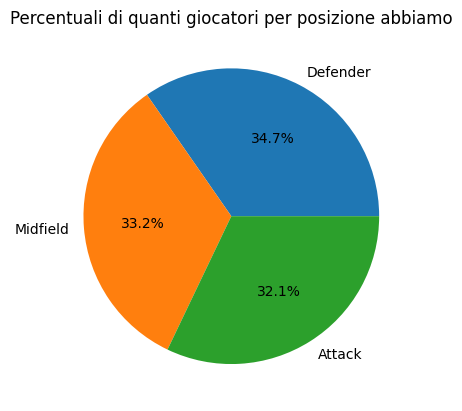

,yellow_cards,red_cards,goals,assists,minutes_played,position,height_in_cm,player_in_id
player_id,,,,,,,,
10,19,0,48,24,8808,2,184.0,49
65,11,1,38,13,8788,2,181.0,34
77,0,0,0,0,307,0,184.0,1
109,4,0,1,2,3584,0,184.0,3
132,13,0,9,4,3987,1,179.0,26
...,...,...,...,...,...,...,...,...
1159022,0,0,0,0,86,0,190.0,1
1163778,1,0,1,1,493,2,193.0,6
1166093,1,0,1,2,310,1,182.0,2


In [30]:
# ora che abbiamo la tabella, andiamo a levare i portieri (i quali creerebbero un problema di sbilanciamento tra le classi)  e andiamo a levare quellke posizioni che sono missing

df_noportieri = df_finale.drop(df_finale[(df_finale['position'] == 'Goalkeeper') | (df_finale['position'] == 'Missing')].index)

# leviamo valori null 

df_noportieri.dropna()

percentuali = df_noportieri['position'].value_counts(normalize=True) * 100

 
# Creiamo il grafico a torta
plt.pie(percentuali, labels=percentuali.index, autopct='%1.1f%%')
plt.title('Percentuali di quanti giocatori per posizione abbiamo')
plt.savefig("../../../images/bilanciamento_posizioni.png")
plt.show()

#andiamo a sostituire ciascuna posizione con valori numerici difesa = 0, centrocampo = 1, attacco = 2

df_noportieri['position'] = df_noportieri['position'].replace({'Attack': 2, 'Defender': 0, 'Midfield': 1})








In [32]:
# salviamo il dataframe

joblib.dump(df_noportieri, 'df_classif_posiz_processato.joblib')

['df_classif_posiz_processato.joblib']